In [ ]:
#Part 1: Understanding Product Categories


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [8]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv")

In [10]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [21]:
# Frequency table 
frequency_table = df['category'].value_counts()

frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [27]:
tp_visualization = frequency_table.head(5)

C:\Users\sarah\AppData\Local\Temp\ipykernel_14636\856978636.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tp_visualization.index, y=tp_visualization.values, palette="Set3")


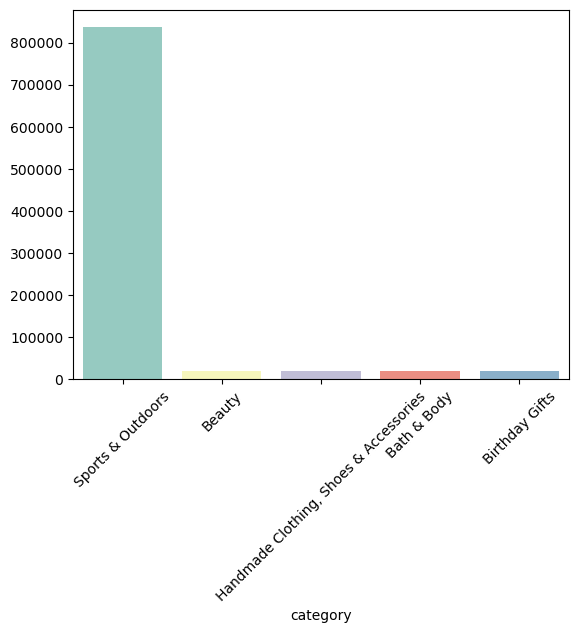

In [31]:
sns.barplot(x=tp_visualization.index, y=tp_visualization.values, palette="Set3")
plt.xticks(rotation=45)
plt.show();

In [85]:
top_5_cat = frequency_table.head(5)

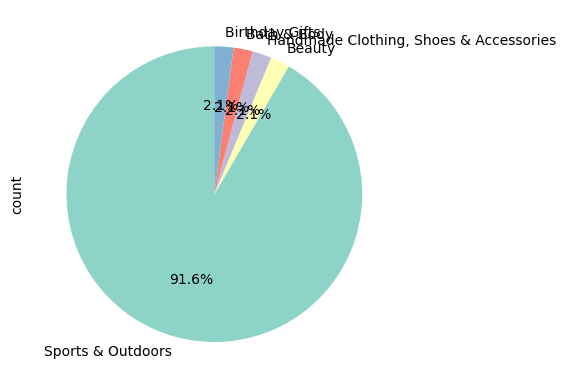

In [87]:
top_5_cat.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show();

In [ ]:
#Part 2: Delving into Product Pricing
#Measures of Centrality:


In [93]:
mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24, 19.09, 9.99)

In [101]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = quantiles_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)



In [103]:
variance_price, std_dev_price, range_price, quantiles_price

(119445.48532256528, 345.60886175352226, 100000.0, 36.0)

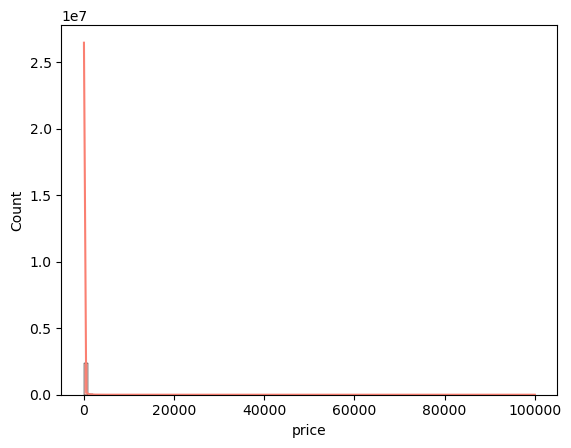

In [109]:
sns.histplot(df['price'], bins=100, kde=True, color="salmon")
plt.show()

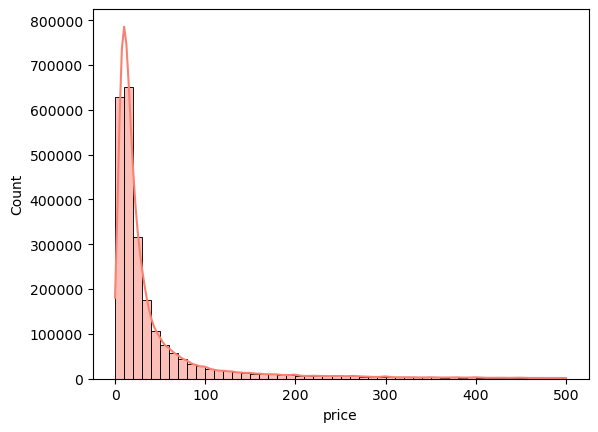

In [110]:
sns.histplot(df[df['price'] < 500]['price'], bins=50, kde=True, color="salmon")
plt.show()

In [113]:
sns.boxplot(x=df['price'])

<Axes: xlabel='price'>

In [115]:
#Part 3: Unpacking Product Ratings


In [117]:
mean_rating = df['stars'].mean().round(2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.15, 0.0, 0.0)

In [119]:
rated_df = df[df['stars'] > 0]

In [121]:
rated_df['stars'].value_counts()

stars
4.5    151577
4.6    136995
4.4    136165
5.0    128492
4.3    112564
4.7     94566
4.2     86871
4.0     66089
4.1     65115
4.8     41858
3.9     36555
3.8     27876
3.7     21137
3.6     16219
3.5     14673
3.0     12819
4.9     11081
3.4     10355
1.0      8484
3.3      8269
3.2      5771
3.1      4679
2.0      3901
2.9      3341
2.8      2306
2.7      2104
2.5      2103
2.6      1579
2.4      1060
2.3       734
2.2       602
2.1       540
1.5       404
1.9       300
1.8       249
1.7       177
1.4       149
1.6       147
1.3        78
1.2        23
1.1         3
Name: count, dtype: int64

In [123]:
mean_rating = rated_df['stars'].mean().round(2)
median_rating = rated_df['stars'].median()
mode_rating = rated_df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(4.32, 4.4, 4.5)

In [125]:
var_stars = df['stars'].var()
std_stars = df['stars'].std()
range_stars = df['stars'].max() - df['stars'].min()
iqr_stars = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Ratings Variance: {var_stars}")
print(f"Ratings Standard Deviation: {std_stars}")
print(f"Range Ratings: {range_stars}")
print(f"IQR (Interquartile Range) Ratings: {iqr_stars}")

Ratings Variance: 4.81743402976196
Ratings Standard Deviation: 2.1948653785054697
Range Ratings: 5.0
IQR (Interquartile Range) Ratings: 4.4


In [127]:
var_stars_rat = rated_df['stars'].var()
std_stars_rat = rated_df['stars'].std()
range_stars_rat = rated_df['stars'].max() - rated_df['stars'].min()
iqr_stars_rat = rated_df['stars'].quantile(0.75) - rated_df['stars'].quantile(0.25)

print("Among rated products:")
print(f"Ratings Variance: {var_stars_rat}")
print(f"Ratings Standard Deviation: {std_stars_rat}")
print(f"Range Ratings: {range_stars_rat}")
print(f"IQR (Interquartile Range) Ratings: {iqr_stars_rat}")

Among rated products:
Ratings Variance: 0.3083433752380519
Ratings Standard Deviation: 0.5552867504614637
Range Ratings: 4.0
IQR (Interquartile Range) Ratings: 0.5


In [131]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

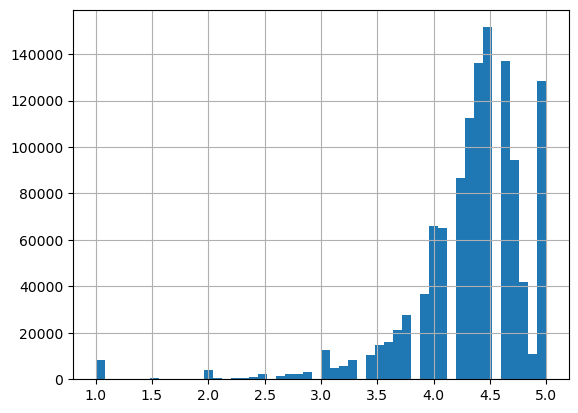

In [133]:
rated_df['stars'].hist(bins=50, xlabelsize=10, ylabelsize=10)
plt.show();